# Machine Learning Algorithms using Nonparametric Methods and comparing with Parametric Methods

## Loading the Data

In [3]:
rm(list=ls())
data<- read.csv("https://raw.githubusercontent.com/rajdeepsaha0809/Nonpartametric-Inference-Project/main/framingham%20heart%20disease%20dataset.csv")
head(data)
dim(data)
str(data)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


[1] 4238   16

'data.frame':	4238 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


## Checking for missing values 

[1] 645

male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,heartRate,BMI,cigsPerDay,totChol,BPMeds,education,glucose,
3656,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
331,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
51,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,2
9,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
38,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,2
1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,2
1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,3


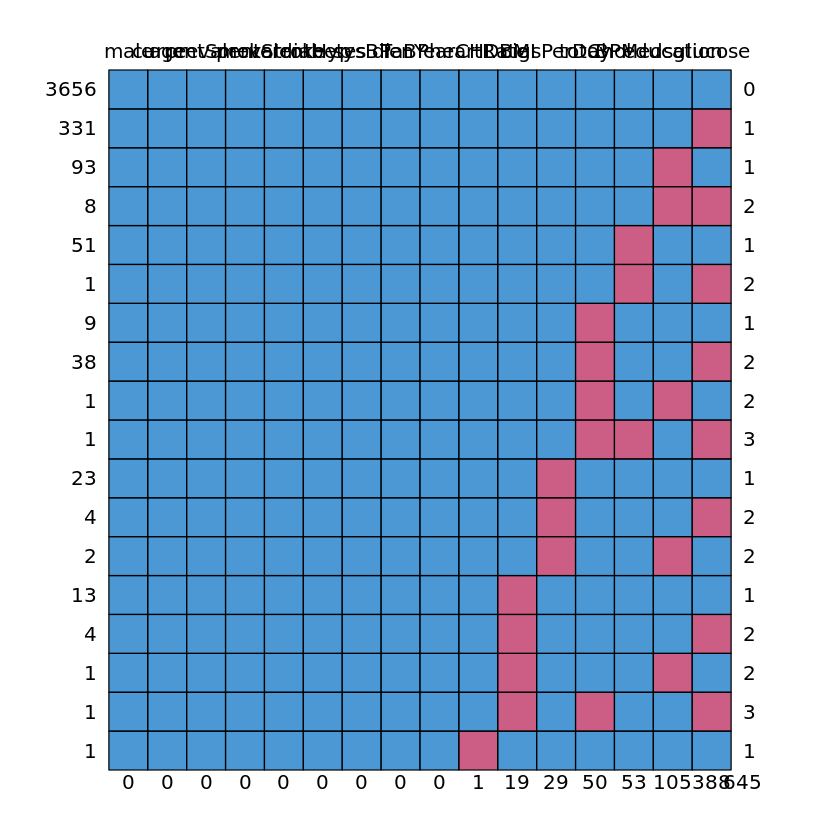

In [4]:
sum(is.na(data))
cbind(lapply(lapply(data, is.na), sum))
library(mice)
md.pattern(data)

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep


Warning message in plot.aggr(res, ...):
“not enough horizontal space to display frequencies”



 Variables sorted by number of missings: 
        Variable        Count
         glucose 0.0915526192
       education 0.0247758377
          BPMeds 0.0125058990
         totChol 0.0117980179
      cigsPerDay 0.0068428504
             BMI 0.0044832468
       heartRate 0.0002359604
            male 0.0000000000
             age 0.0000000000
   currentSmoker 0.0000000000
 prevalentStroke 0.0000000000
    prevalentHyp 0.0000000000
        diabetes 0.0000000000
           sysBP 0.0000000000
           diaBP 0.0000000000
      TenYearCHD 0.0000000000


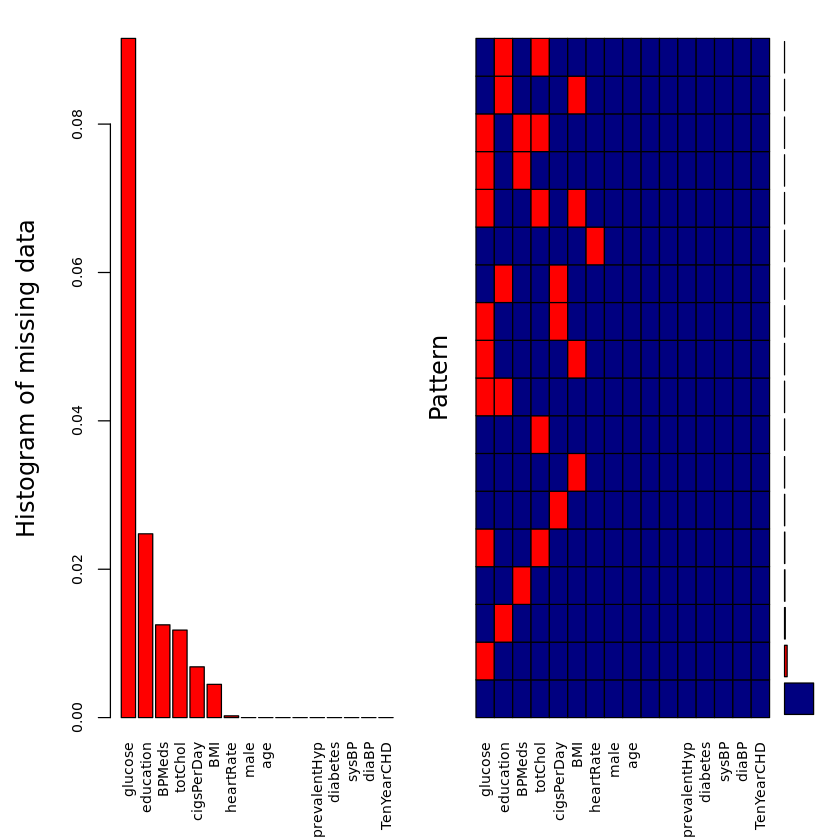

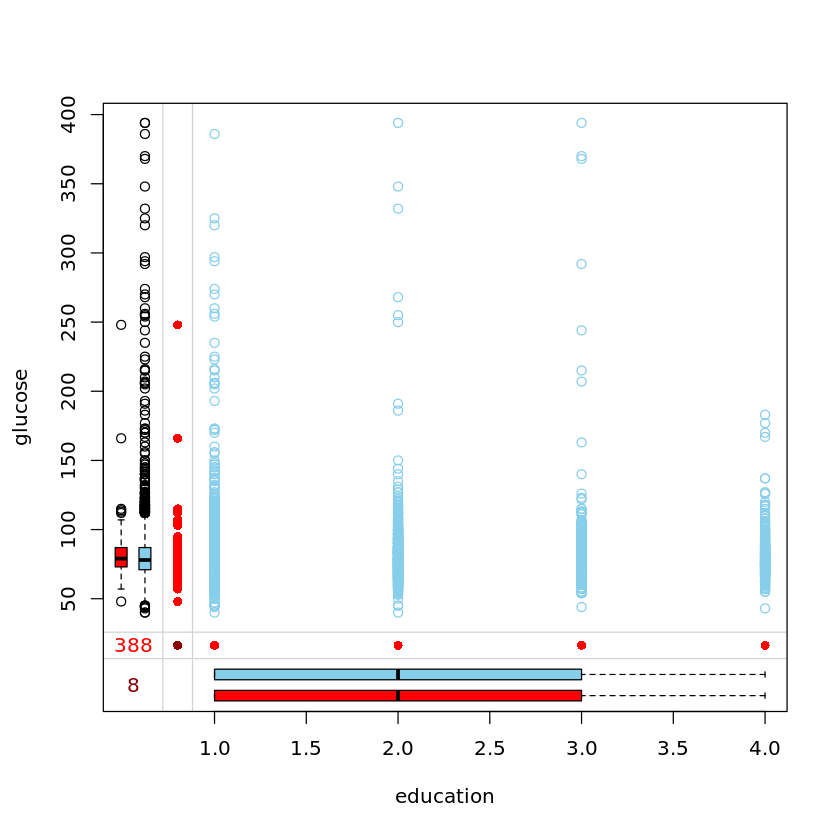

In [5]:
library(VIM)
aggr_plot <- aggr(data, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))
marginplot(data[c(3,15)])

## Imputing the missing data

In [6]:
library(Rcpp)
tempData <- mice(data, m=5, maxit= 50, meth= 'pmm', seed= 500)
summary(tempData)
Data <- complete(tempData, 1)
sum(is.na(Data))


 iter imp variable
  1   1  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  1   2  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  1   3  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  1   4  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  1   5  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  2   1  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  2   2  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  2   3  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  2   4  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  2   5  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  3   1  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  3   2  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  3   3  education  cigsPerDay  BPMeds  totChol  BMI  heartRate  glucose
  3   4  education  cigsPerDay 

Class: mids
Number of multiple imputations:  5 
Imputation methods:
           male             age       education   currentSmoker      cigsPerDay 
             ""              ""           "pmm"              ""           "pmm" 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
          "pmm"              ""              ""              ""           "pmm" 
          sysBP           diaBP             BMI       heartRate         glucose 
             ""              ""           "pmm"           "pmm"           "pmm" 
     TenYearCHD 
             "" 
PredictorMatrix:
              male age education currentSmoker cigsPerDay BPMeds
male             0   1         1             1          1      1
age              1   0         1             1          1      1
education        1   1         0             1          1      1
currentSmoker    1   1         1             0          1      1
cigsPerDay       1   1         1             1          0      1
BPMed

[1] 0

## Check for Data Imbalance

In [7]:
attach(Data)
sum(TenYearCHD == 1) / nrow(Data)
sum(TenYearCHD == 0) / nrow(Data)
library(ROSE)
newData <- ovun.sample(TenYearCHD~., data = Data, method = "over", N = 7000)$data
attach(newData)
paste("Percentage of positive example is",round(sum(TenYearCHD == 1) / nrow(newData),4)*100,"%")
paste("Percentage of negative example is",round(sum(TenYearCHD == 0) / nrow(newData),4)*100,"%")

The following object is masked from package:VIM:

    diabetes




[1] 0.1519585

[1] 0.8480415

Loaded ROSE 0.0-4


The following objects are masked from Data:

    age, BMI, BPMeds, cigsPerDay, currentSmoker, diabetes, diaBP,
    education, glucose, heartRate, male, prevalentHyp, prevalentStroke,
    sysBP, TenYearCHD, totChol


The following object is masked from package:VIM:

    diabetes




[1] "Percentage of positive example is 48.66 %"

[1] "Percentage of negative example is 51.34 %"

## Feature Selection for Logistic Regression

Subset selection object
Call: regsubsets.formula(TenYearCHD ~ ., data = newData, nvmax = 16)
15 Variables  (and intercept)
                Forced in Forced out
male                FALSE      FALSE
age                 FALSE      FALSE
education           FALSE      FALSE
currentSmoker       FALSE      FALSE
cigsPerDay          FALSE      FALSE
BPMeds              FALSE      FALSE
prevalentStroke     FALSE      FALSE
prevalentHyp        FALSE      FALSE
diabetes            FALSE      FALSE
totChol             FALSE      FALSE
sysBP               FALSE      FALSE
diaBP               FALSE      FALSE
BMI                 FALSE      FALSE
heartRate           FALSE      FALSE
glucose             FALSE      FALSE
1 subsets of each size up to 15
Selection Algorithm: exhaustive
          male age education currentSmoker cigsPerDay BPMeds prevalentStroke
1  ( 1 )  " "  "*" " "       " "           " "        " "    " "            
2  ( 1 )  " "  "*" " "       " "           " "        " "    " "   

[1] 8

Warning message in plot.window(...):
“"types" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"types" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"types" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"types" is not a graphical parameter”
Warning message in box(...):
“"types" is not a graphical parameter”
Warning message in title(...):
“"types" is not a graphical parameter”


(Intercept)            male             age      cigsPerDay prevalentStroke 
  -0.9024762473    0.0993348649    0.0146702905    0.0046560083    0.1615296063 
   prevalentHyp         totChol           sysBP         glucose 
   0.0676480123    0.0004404892    0.0023044474    0.0010977875

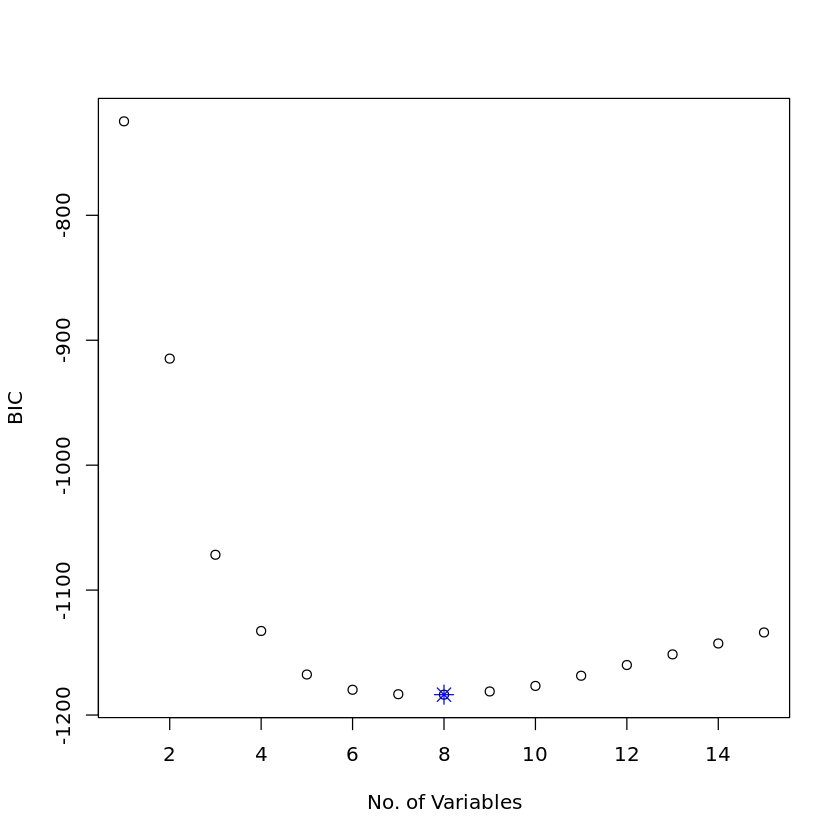

In [11]:
library(leaps)
set.seed(2022)
regfit.full = regsubsets(TenYearCHD~., data = newData, nvmax = 16)
reg.summary = summary(regfit.full)
reg.summary
which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "No. of Variables", ylab = "BIC", types = 'l')
points(8, reg.summary$bic[8], col= "blue", cex=1.5, pch = 8)
coef(regfit.full, 8)

## Data for Parametric Approach

In [15]:
names(coef(regfit.full, 8))[-1]
par_Data = newData[,c(1, 2, 5, 7, 8, 11, 12, 15, 16)]
dim(par_Data)
par_Data$TenYearCHD <- as.factor(par_Data$TenYearCHD)

[1] "male"            "age"             "cigsPerDay"      "prevalentStroke"
[5] "prevalentHyp"    "totChol"         "sysBP"           "glucose"

[1] 7000    9

## Splitting the Data

In [16]:
set.seed(2022)
index1 = sample(1:nrow(par_Data),floor(0.85*nrow(par_Data)))
train1 = par_Data[index1, ]
remaining1 = par_Data[-index1, ]
index2 = sample(1:nrow(remaining1),floor(2/3*nrow(remaining1)))
crossval1 = remaining1[index2, ]
test1 = remaining1[-index2, ]
actual_TenYearCHD=crossval1$TenYearCHD
dim(train1)
dim(crossval1)
dim(test1)

[1] 5950    9

[1] 700   9

[1] 350   9

In [19]:
library(tibble)
library(cvms)
f_cfm <- function(x){
  cfm <- as.tibble(x)
  cname <- colnames(cfm)
  print(plot_confusion_matrix(cfm, target_col = cname[2], prediction_col =  cname[1], counts_col = cname[3]))
}

## Logistic Regression

The following objects are masked from newData:

    age, cigsPerDay, diaBP, glucose, male, prevalentHyp,
    prevalentStroke, sysBP, TenYearCHD


The following objects are masked from Data:

    age, cigsPerDay, diaBP, glucose, male, prevalentHyp,
    prevalentStroke, sysBP, TenYearCHD




threshold,fscore
<dbl>,<dbl>
0.10,0.6544755
0.11,0.6551060
0.12,0.6538091
0.13,0.6550725
0.14,0.6576140
0.15,0.6595331
0.16,0.6627566
0.17,0.6666667
0.18,0.6719524


[1] "Maximum F1-score is for thresold value of  0.44  and is =  0.7263"

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
“'ggimage' is missing. Will not plot arrows and zero-shading.”
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
“'rsvg' is missing. Will not plot arrows and zero-shading.”


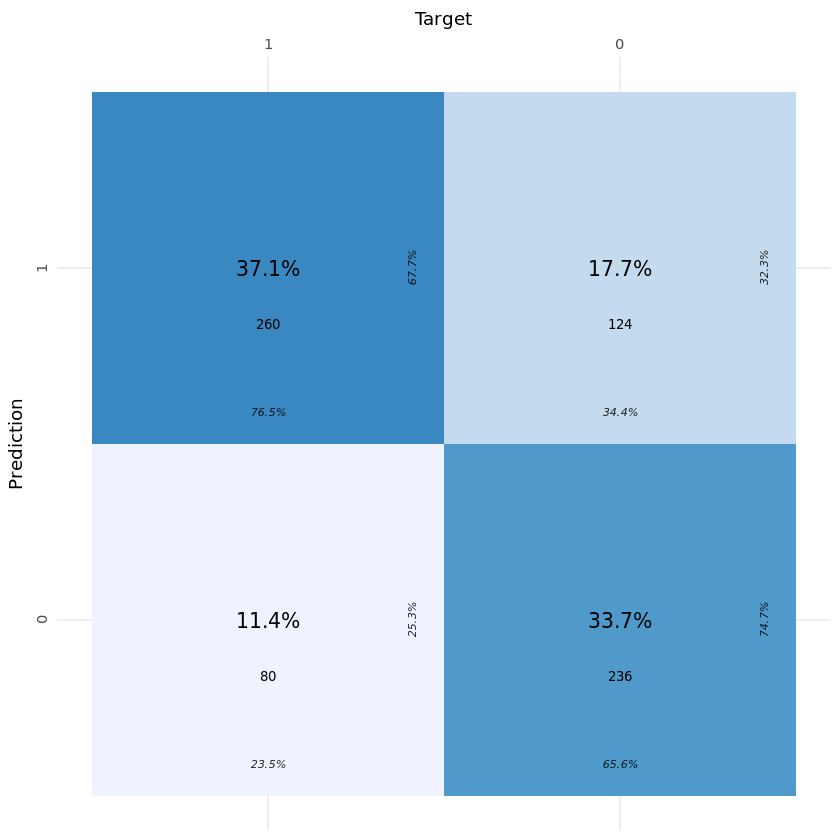

In [20]:
attach(par_Data)
TenYearCHD <- as.factor(TenYearCHD)
threshold <- seq(0.1, 0.9, 0.01)
fscore <- array(0)
for(i in 1:length(threshold)){
  logistic.fit <- glm(TenYearCHD~., data = train1, family = binomial)
  logistic.probs <- predict(logistic.fit, crossval1, type = "response")
  logistic.pred <- rep("0", nrow(crossval1))
  logistic.pred[logistic.probs > threshold[i]]= "1"
  tab <- table(logistic.pred, crossval1$TenYearCHD)
  prec <- tab[2,2]/(tab[2,2] + tab[2,1])
  #print(prec)
  recall <- tab[2,2]/(tab[2,2] + tab[1,2])
  #print(recall)
  fscore[i] <- (2*prec*recall)/(prec + recall)
}
data.frame(threshold, fscore)
max_acc <- which.max(fscore)
paste("Maximum F1-score is for thresold value of ", threshold[max_acc], " and is = ",round(fscore[max_acc],4))

logistic.fit <- glm(TenYearCHD~., data = crossval1, family = binomial)
logistic.probs <- predict(logistic.fit, crossval1, type = "response")
logistic.pred <- rep(0, nrow(crossval1))
logistic.pred[logistic.probs > threshold[max_acc]] = 1
actual <- crossval1$TenYearCHD
logistic_table <- table(logistic.pred, actual)
f_cfm(logistic_table)

In [21]:
#We will use data with all the features for nonparametric approach
finalData <- newData
attach(finalData)
finalData$TenYearCHD <- as.factor(finalData$TenYearCHD)
set.seed(2022)
index1 = sample(1:nrow(finalData),floor(0.85*nrow(finalData)))
train = finalData[index1, ]
remaining = finalData[-index1, ]
index2 = sample(1:nrow(remaining),floor(2/3*nrow(remaining)))
crossval = remaining[index2, ]
test = remaining[-index2, ]
actual_TenYearCHD=crossval$TenYearCHD
dim(train)
dim(crossval)
dim(test)

The following object is masked _by_ .GlobalEnv:

    TenYearCHD


The following objects are masked from par_Data:

    age, cigsPerDay, diaBP, glucose, male, prevalentHyp,
    prevalentStroke, sysBP, TenYearCHD


The following objects are masked from newData:

    age, BMI, BPMeds, cigsPerDay, currentSmoker, diabetes, diaBP,
    education, glucose, heartRate, male, prevalentHyp, prevalentStroke,
    sysBP, TenYearCHD, totChol


The following objects are masked from Data:

    age, BMI, BPMeds, cigsPerDay, currentSmoker, diabetes, diaBP,
    education, glucose, heartRate, male, prevalentHyp, prevalentStroke,
    sysBP, TenYearCHD, totChol


The following object is masked from package:VIM:

    diabetes




[1] 5950   16

[1] 700  16

[1] 350  16

## Decision Tree

The following object is masked _by_ .GlobalEnv:

    TenYearCHD


The following objects are masked from finalData (pos = 4):

    age, BMI, BPMeds, cigsPerDay, currentSmoker, diabetes, diaBP,
    education, glucose, heartRate, male, prevalentHyp, prevalentStroke,
    sysBP, TenYearCHD, totChol


The following objects are masked from finalData (pos = 5):

    age, BMI, BPMeds, cigsPerDay, currentSmoker, diabetes, diaBP,
    education, glucose, heartRate, male, prevalentHyp, prevalentStroke,
    sysBP, TenYearCHD, totChol


The following objects are masked from par_Data:

    age, cigsPerDay, diaBP, glucose, male, prevalentHyp,
    prevalentStroke, sysBP, TenYearCHD


The following objects are masked from newData:

    age, BMI, BPMeds, cigsPerDay, currentSmoker, diabetes, diaBP,
    education, glucose, heartRate, male, prevalentHyp, prevalentStroke,
    sysBP, TenYearCHD, totChol


The following objects are masked from Data:

    age, BMI, BPMeds, cigsPerDay, currentSmoker, diabetes, di

$size
[1] 4 2 1

$dev
[1] 2111 2214 2888

$k
[1]  -Inf 110.5 674.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
“'ggimage' is missing. Will not plot arrows and zero-shading.”
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
“'rsvg' is missing. Will not plot arrows and zero-shading.”


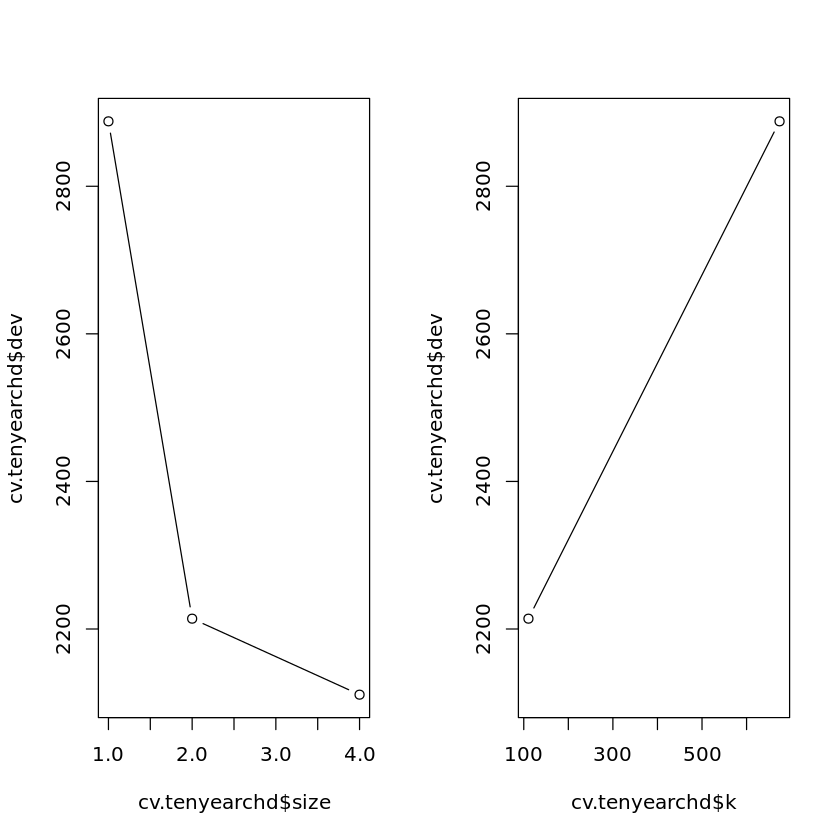

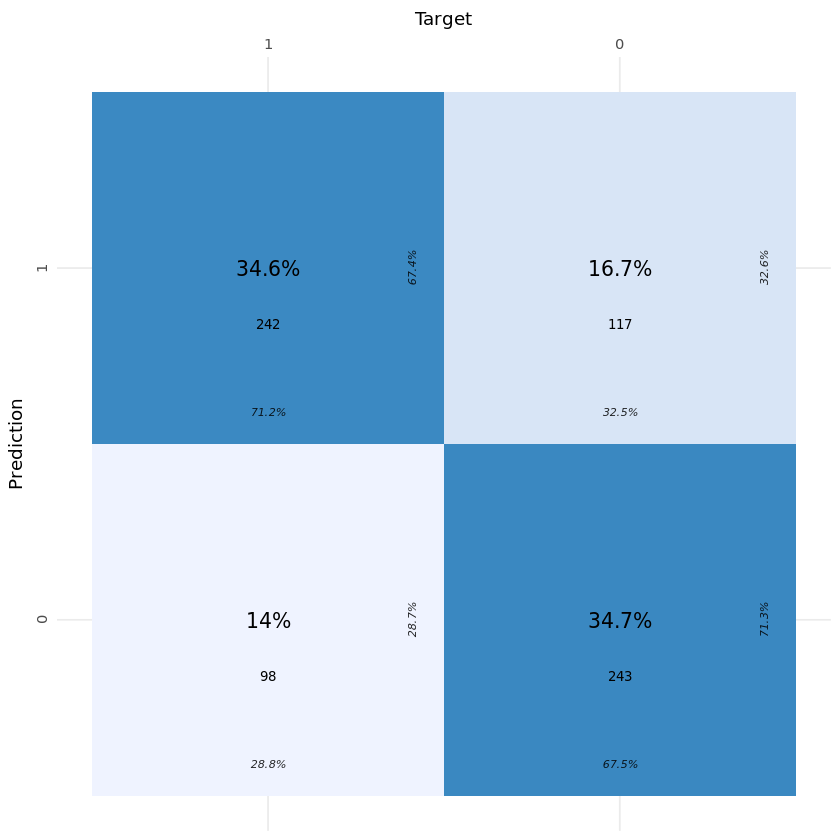

In [23]:
attach(finalData)
finalData$TenYearCHD <- as.factor(finalData$TenYearCHD)
library(tree)
set.seed(2022)
tree.fit <- tree(TenYearCHD~., data= train)
cv.tenyearchd <- cv.tree(tree.fit, FUN= prune.misclass)
cv.tenyearchd #dev corresponds to misclassification error rate
par(mfrow=c(1,2))
plot(cv.tenyearchd$size, cv.tenyearchd$dev, type= "b")
plot(cv.tenyearchd$k, cv.tenyearchd$dev, type= "b")
prune.tree <- prune.misclass(tree.fit, best = 4)
plot(prune.tree)
text(prune.tree, pretty = 0)
tree.pred <- predict(prune.tree, crossval, type = "class")
tree_table <- table(tree.pred, actual)
f_cfm(tree_table)

## Random Forest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
“'ggimage' is missing. Will not plot arrows and zero-shading.”
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
“'rsvg' is missing. Will not plot arrows and zero-shading.”


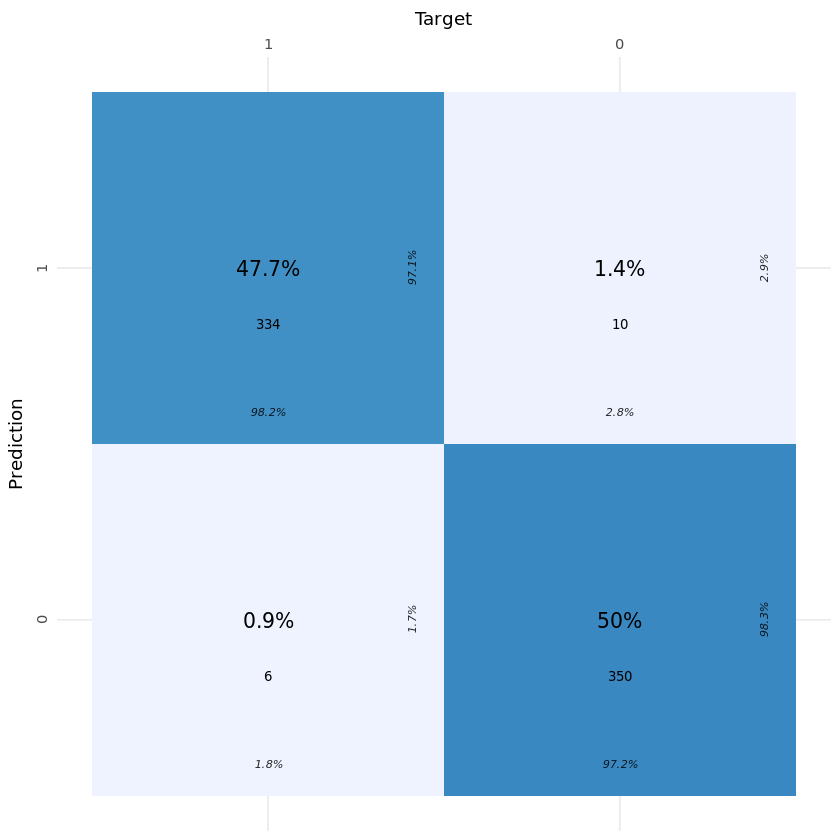

In [26]:
set.seed(2022)
library(randomForest)
used_pred <- floor(sqrt(ncol(finalData)))
rf.fit <- randomForest(TenYearCHD~., data = train, mtry = used_pred,
           importance = TRUE, maxdepth = 8)
rf.pred <- predict(rf.fit, newdata = crossval)
rf_table <- table(rf.pred, actual)
f_cfm(rf_table)

## Calculation of F_Score for Each Method

In [27]:
#Logistic Regression
p1 <- logistic_table[1,1]/(logistic_table[1,1]+ logistic_table[1,2])
r1 <- logistic_table[1,1]/(logistic_table[1,1]+ logistic_table[2,1])
f_logistic <- round(2*p1*r1/(p1+r1), 4)
f_logistic

#Decision Tree
p2 <- tree_table[1,1]/(tree_table[1,1]+ tree_table[1,2])
r2 <- tree_table[1,1]/(tree_table[1,1]+ tree_table[2,1])
f_tree <- round(2*p2*r2/(p2+r2), 4)
f_tree

#Random Forest
p3 <- rf_table[1,1]/(rf_table[1,1]+ rf_table[1,2])
r3 <- rf_table[1,1]/(rf_table[1,1]+ rf_table[2,1])
f_forest <- round(2*p3*r3/(p3+r3), 4)
f_forest

[1] 0.6982

[1] 0.6933

[1] 0.9777

## Plotting ROC curve

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:colorspace’:

    coords


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "Area under the curve is 0.7756"

Setting levels: control = 0, case = 1

Setting direction: controls < cases



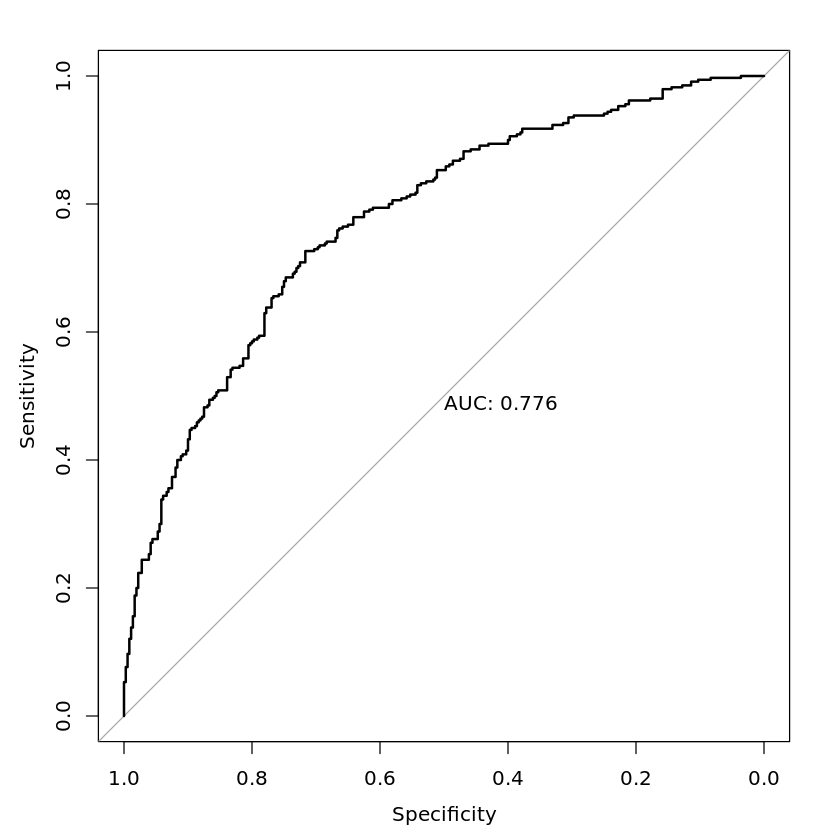

[1] "Area under the curve is 0.7253"

Setting levels: control = 0, case = 1

Setting direction: controls < cases



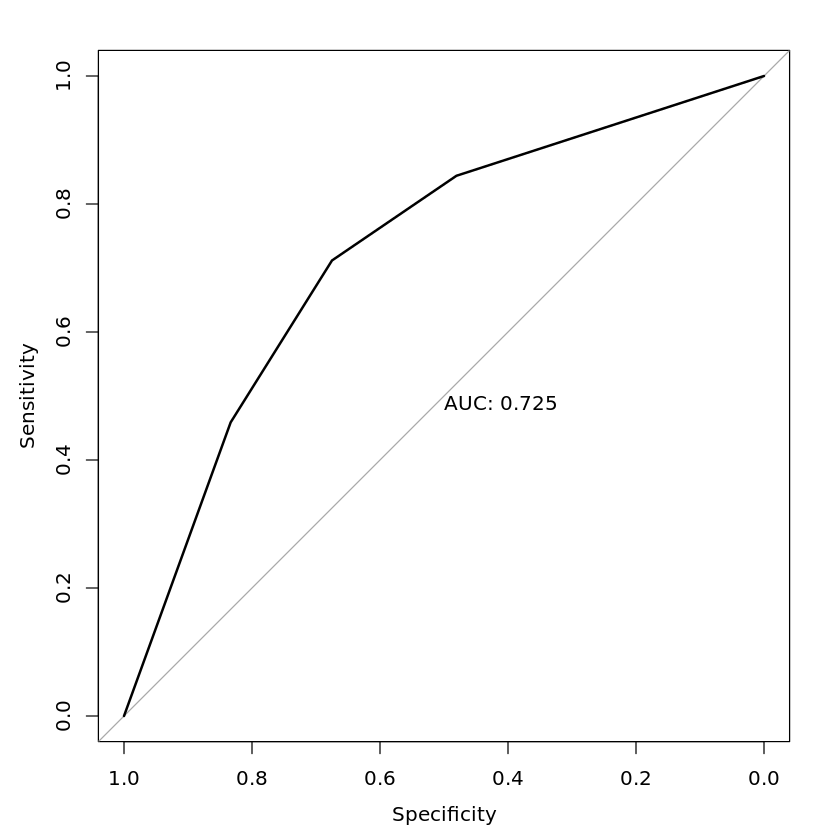

[1] "Area under the curve is 0.9958"

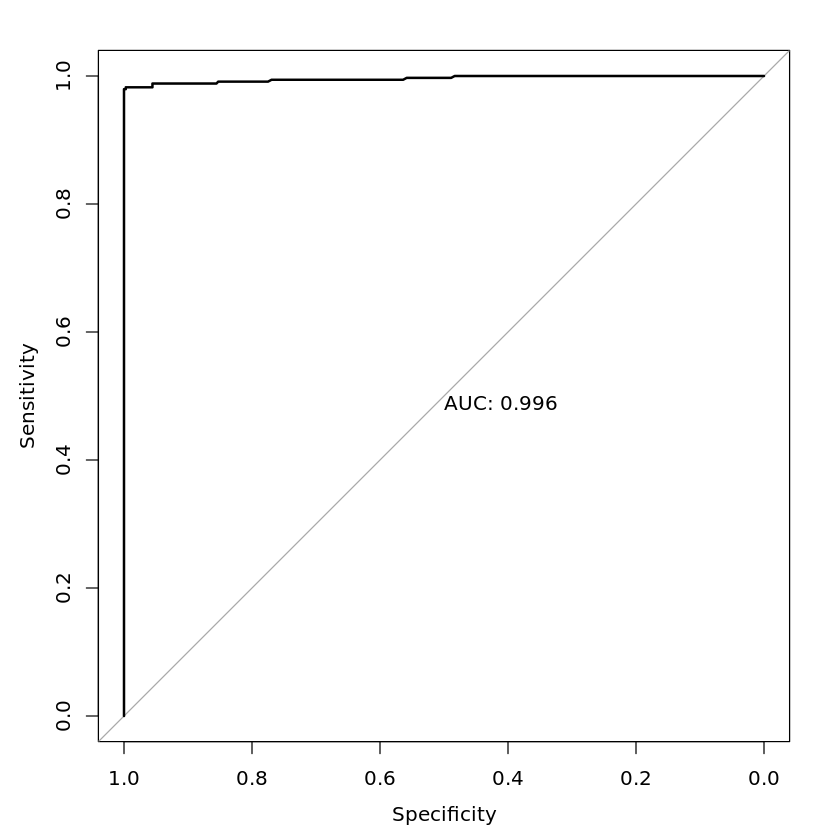

In [29]:
#Logistic Regression
library(pROC)
logistic_prob = predict(logistic.fit, newdata = crossval1, type = "response")
logistic_roc = roc(crossval1$TenYearCHD ~ logistic_prob, plot = TRUE, print.auc = TRUE)
paste("Area under the curve is",round(auc(logistic_roc), 4))

#Decision Tree
tree_predict= predict(prune.tree, crossval, type="vector")
tree_roc = roc(crossval$TenYearCHD~tree_predict[,2], plot = TRUE, print.auc = TRUE)
paste("Area under the curve is",round(auc(tree_roc), 4))

#Random Forest
rf_predict= predict(rf.fit, crossval, type="prob")
rf_roc = roc(crossval$TenYearCHD~rf_predict[,2], plot = TRUE, print.auc = TRUE)
paste("Area under the curve is",round(auc(rf_roc), 4))

In [37]:
library(formattable)
data_frame <- data.frame(c("Logistic Regression", "Decision Tree", "Random Forest"), c(f_logistic, f_tree, f_forest),c(round(auc(logistic_roc), 4), round(auc(tree_roc), 4), round(auc(rf_roc), 4) ))
colnames(data_frame) <- c("Method", "F-Score", "AUC")
formattable(data_frame, list('Method' = formatter("span", style = ~ style(color = "Blue",font.weight = "bold"))))
paste("Since F-Score and AUC are the highest for Random Forest, we will choos ethis model to be the best one.")

Method,F-Score,AUC
<chr>,<dbl>,<dbl>
Logistic Regression,0.6982,0.7756
Decision Tree,0.6933,0.7253
Random Forest,0.9777,0.9958


[1] "Since F-Score and AUC are the highest for Random Forest, we will choos ethis model to be the best one"

## Final Fit 

Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
“'ggimage' is missing. Will not plot arrows and zero-shading.”
Warning message in plot_confusion_matrix(cfm, target_col = cname[2], prediction_col = cname[1], :
“'rsvg' is missing. Will not plot arrows and zero-shading.”


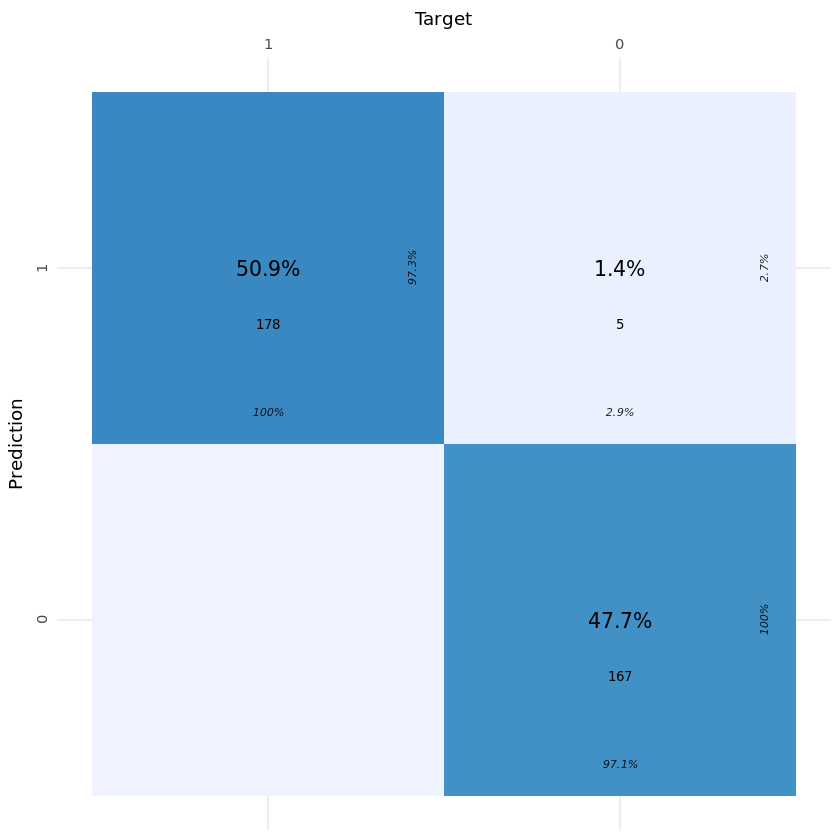

In [32]:
final_fit <- predict(rf.fit, newdata = test)
actual_test <- test$TenYearCHD
final_rf_table <- table(final_fit, actual_test)
f_cfm(final_rf_table)

## Evaluation Metric for Test Set

[1] 0.9853

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "Area under the curve is 0.9999"

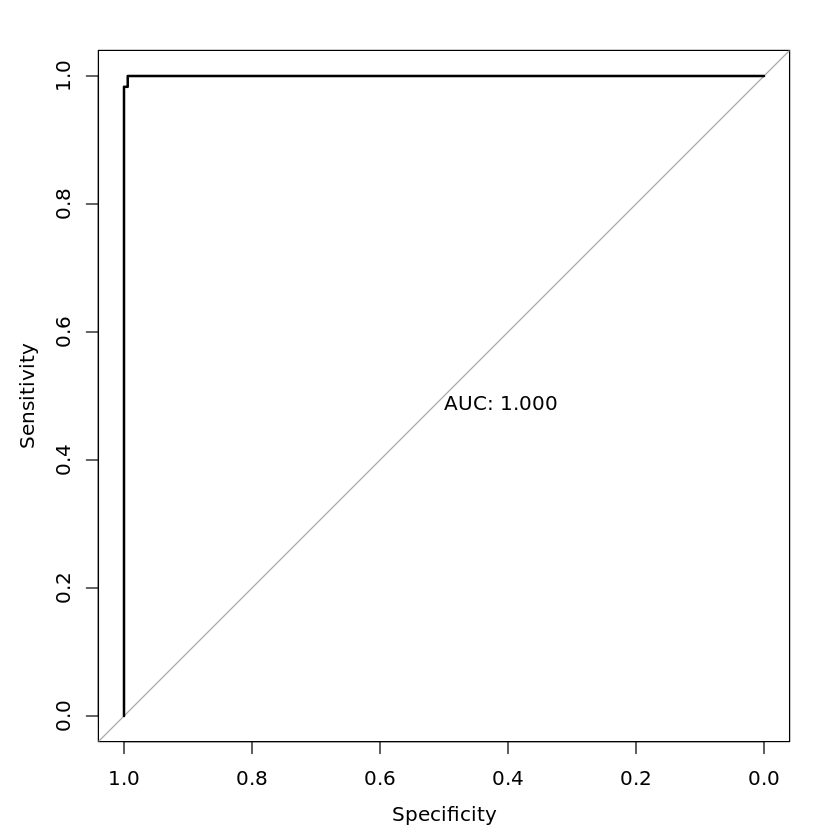

In [34]:
#F_Score
p <- final_rf_table[1,1]/(final_rf_table[1,1]+ final_rf_table[1,2])
r <- final_rf_table[1,1]/(final_rf_table[1,1]+ final_rf_table[2,1])
F <- round(2*p*r/(p+r), 4)
F 


rf_predict_test= predict(rf.fit, test, type="prob")
tree_roc_test = roc(test$TenYearCHD~rf_predict_test[,2], plot = TRUE, print.auc = TRUE)
paste("Area under the curve is",round(auc(tree_roc_test),4))